## Consegna

Lab-6a: ranking su basicness dei synset di WordNet. Si richiede di creare un mapping tra i synset di WordNet ed un basicness score (ad es. [0, 1]), utilizzando dati, risorse, features e approcci che credete opportuni alla risoluzione del task. 

## Import

In [2]:
from nltk.corpus import wordnet as wn
from nltk.corpus import semcor
from collections import Counter
import string
import matplotlib.pyplot as plt
import numpy as np

## Salvataggio di tutti i synset dei nomi da Wordnet

In [3]:
synsets = list(wn.all_synsets(wn.NOUN)) 

## Calcolo della massima profondità del grafo di Wordnet

In [4]:
max_depth = 0
for synset in synsets:
    depth = synset.max_depth()
    if depth > max_depth:
        max_depth = depth

## Funzione per il calcolo del basicness score
Calcolata attraverso il rapporto della profondità del synset diviso la massima profondità dell'albero

In [5]:
def calculate_basicness_score(synset, max_depth):
    #Calcolo la profondità del synset nella gerarchia di WordNet
    depth = synset.max_depth()
    #rapporto tra profondità albero e profindità del synset
    basicness_score =1-( depth / max_depth )
    

    return synset, basicness_score



## Main

In [6]:
basicness_scores = {}

for synset in synsets:
    syn,score = calculate_basicness_score(synset, max_depth)
    basicness_scores[syn] = score
    
sorted_scores = dict(sorted(basicness_scores.items(), key=lambda item: item[1],reverse = True))

## Stampa dei risultati

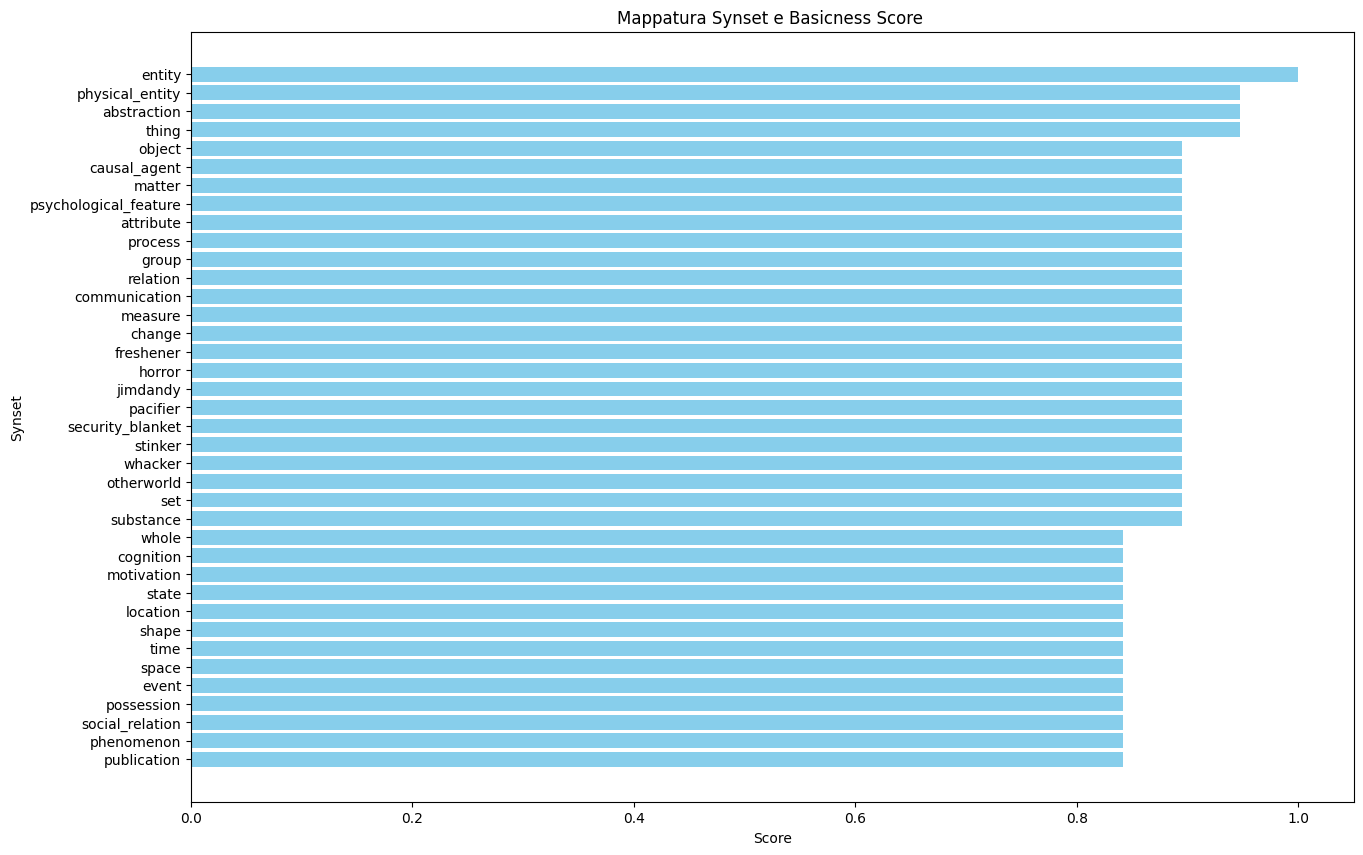

In [7]:

#preparazione dati per grafico
synsets = list(sorted_scores.keys())
values = list(sorted_scores.values())
lemma_synsets=[]
first_value=[]
i=0
lemma_synsets = [s.lemmas()[0].name() for i, s in enumerate(synsets) if i < 40]
first_values = [v for i,v in enumerate(values) if i < 40]

#grafico a barre primi 40 synset mappati
plt.figure(figsize=(15, 10))
plt.barh(lemma_synsets, first_values, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Synset')
plt.title('Mappatura Synset e Basicness Score ')
plt.gca().invert_yaxis() 
plt.show()
